In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#fix the random seed
np.random.seed(42)

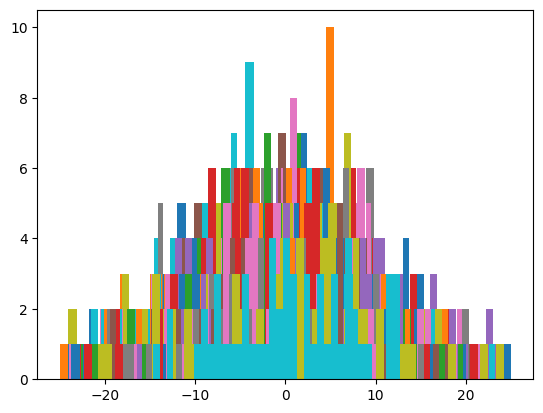

In [3]:
def generate_load_profile():
    load = np.random.randint(325, 375)  # generate a random load between 200 and 500 kW
    profile = [load]
    load_change_list = []
    for _ in range(1, 60):  # generate load for subsequent 59 minutes
        #generate a normal distributed number between -25 and 25, the numbers are not exceeded by 25
        load_change = np.random.normal(0, 7.5)
        if _ < 30:  # for the first 30 minutes, the load change is limited to 10 kW
            load_change = load_change + np.random.randint(0, 5)
        if _ > 30:
            load_change = load_change + np.random.randint(-5, 0)
        if load_change > 25:
            load_change = 25
        elif load_change < -25:
            load_change = -25
        load_change_list.append(load_change)
        load = max(200, min(500, load + load_change))  # ensure load stays within 200 and 500 kW range
        profile.append(load)
    
    plt.hist(load_change_list, bins=50)
    return profile

# Generate 200 load profiles
load_profiles = [generate_load_profile() for _ in range(200)]

# Split the profiles into in-sample (50 profiles) and out-of-sample (150 profiles)
in_sample_profiles = load_profiles[:50]
out_of_sample_profiles = load_profiles[50:]

# Now, you can use in_sample_profiles for in-sample decision making and out_of_sample_profiles for out-of-sample analysis.
load_profiles = pd.DataFrame(load_profiles).T
load_profiles.to_csv('load_profiles.csv', index=False)

In [4]:
load_profiles.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,363.000000,369.000000,332.000000,369.000000,368.000000,356.000000,329.000000,346.000000,364.000000,337.000000,...,342.000000,329.000000,355.000000,340.000000,365.000000,326.000000,356.000000,349.000000,367.000000,334.000000
1,362.873241,371.706925,341.070365,372.076748,372.342059,350.055899,331.783594,352.221548,372.183115,336.395084,...,358.289949,337.597283,362.674456,345.911612,365.407968,326.185559,349.522184,341.501936,361.274823,334.534943
2,370.738989,373.917497,348.105065,377.335011,379.260906,357.564245,328.253705,353.204883,373.248512,349.148356,...,357.637161,339.877296,362.138566,337.317552,358.602924,334.242442,356.276480,342.051511,350.405940,326.815562
3,370.982839,369.752398,357.480969,378.446374,383.813111,358.677228,335.914036,348.905938,376.290793,362.306670,...,353.596603,340.667920,357.521930,346.630855,367.963646,342.695477,355.983505,347.586193,355.976934,313.904225
4,371.226812,377.972208,364.438519,384.026885,384.220740,364.298028,349.765041,348.568584,380.454383,361.345083,...,359.787867,331.430472,347.582321,342.438737,357.910959,342.898019,360.633685,359.927428,368.767464,312.231061


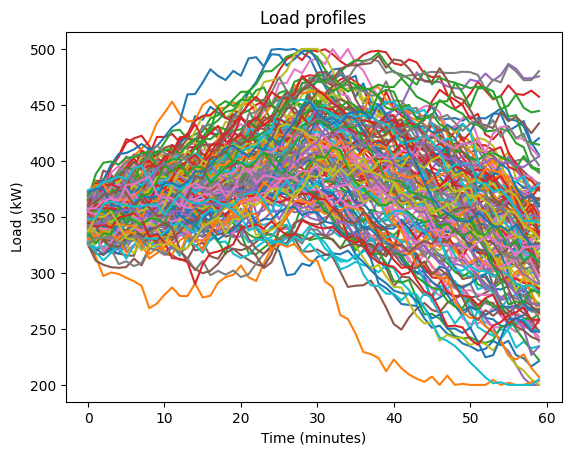

In [5]:
# Plot the first 5 load profiles
for i in range(150):
    plt.plot(load_profiles.index, load_profiles[i], label=f'Profile {i+1}')
plt.xlabel('Time (minutes)')
plt.ylabel('Load (kW)')
plt.title('Load profiles')
plt.show()

In [6]:
# Read the load profiles from the CSV file
load_profiles = pd.read_csv('load_profiles.csv')

hist_df = pd.DataFrame()

# make histogram for each row
for i in range(load_profiles.shape[0]):
    counter, borders = np.histogram(load_profiles[:][i:i+1], bins=25)
    #invert the counter array
    counter = counter[::-1]
    #add counter as column to hist_df
    hist_df = pd.concat([hist_df, pd.DataFrame(counter)], axis=1)
#get the mean of two consective values of borders list
borders = [(borders[i]+borders[i+1])/2 for i in range(len(borders)-1)]
#round values to 2 decimal places
borders = [round(i, 2) for i in borders]
borders = borders[::-1]
hist_df = hist_df.set_index(pd.Series(borders))

In [7]:
mean_load = load_profiles.mean(axis=1)
print(mean_load)

0     349.105000
1     351.263137
2     352.148586
3     355.113168
4     356.868464
5     358.705218
6     361.202464
7     362.904033
8     364.444709
9     366.378962
10    367.924534
11    370.206107
12    371.471408
13    373.092878
14    374.895436
15    376.754984
16    378.847383
17    381.406062
18    383.993499
19    386.563374
20    388.563659
21    390.586614
22    392.207096
23    394.275938
24    396.454260
25    398.297757
26    400.397114
27    403.303780
28    406.177109
29    407.955271
30    407.799657
31    405.215830
32    402.792752
33    399.577499
34    395.806714
35    392.820681
36    389.748448
37    387.419151
38    385.322420
39    382.424037
40    379.182470
41    376.779111
42    374.420047
43    370.784048
44    367.620163
45    365.415004
46    362.529875
47    359.469741
48    355.797134
49    353.725765
50    350.968967
51    347.262212
52    344.859154
53    341.795553
54    338.446758
55    335.367785
56    331.647132
57    327.914681
58    324.8055

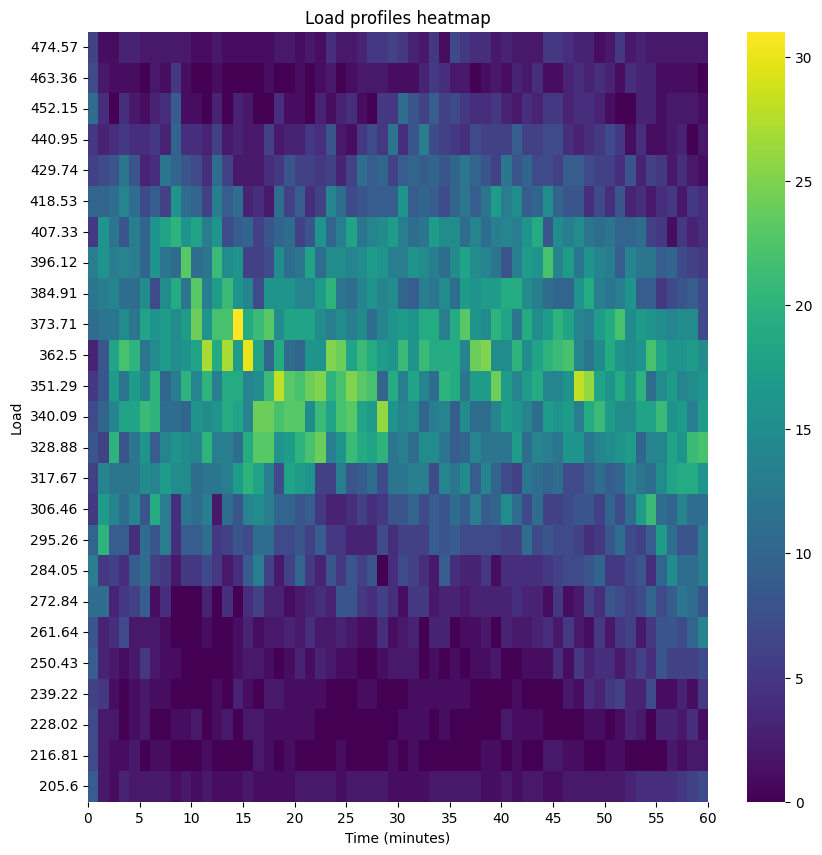

In [8]:
#make a heatmap for for hist_df
plt.figure(figsize=(10, 10))
ax = sns.heatmap(hist_df, cmap='viridis')
#add line to heatmap with mean load values
#sns.lineplot(x=np.arange(0, 60, 1), y=mean_load, color='red', ax=ax)

plt.xticks(np.arange(0, 61, 5), np.arange(0, 61, 5))
plt.xlabel('Time (minutes)')
plt.ylabel('Load')
plt.title('Load profiles heatmap')
#plt.legend()
plt.show()

In [9]:
#cumsum columns of hist_df
hist_df = hist_df.cumsum()
hist_df = hist_df / hist_df.max()


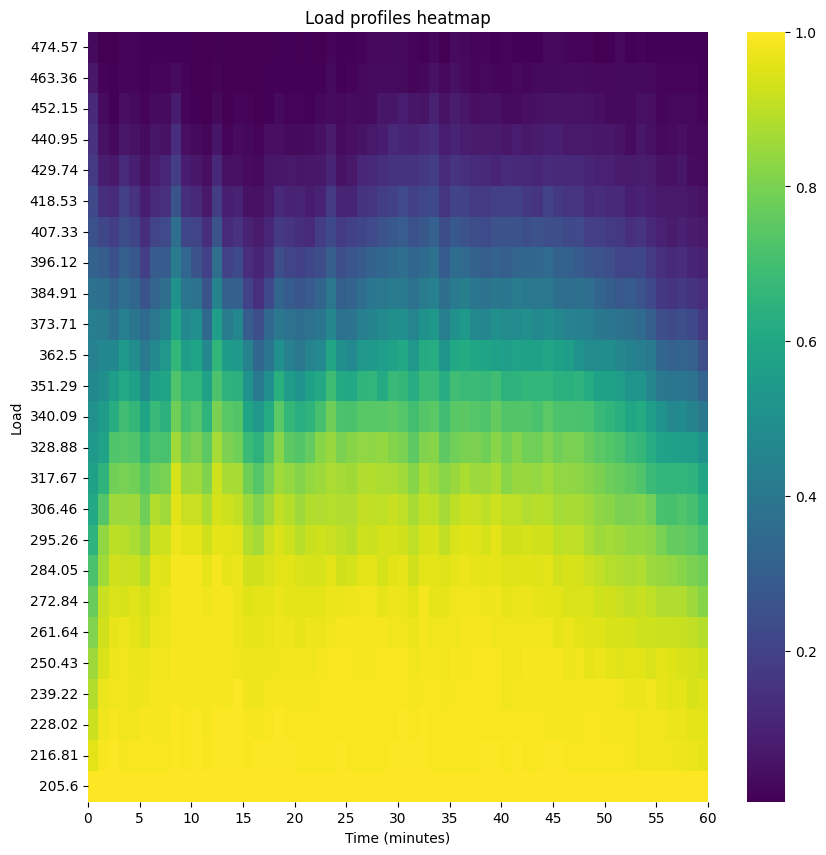

In [10]:
#make a heatmap for for hist_df
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(hist_df.loc[:50], cmap='viridis')
#add line to heatmap with mean load values
plt.xticks(np.arange(0, 61, 5), np.arange(0, 61, 5))
plt.xlabel('Time (minutes)')
plt.ylabel('Load')
plt.title('Load profiles heatmap')
#plt.legend()
plt.show()

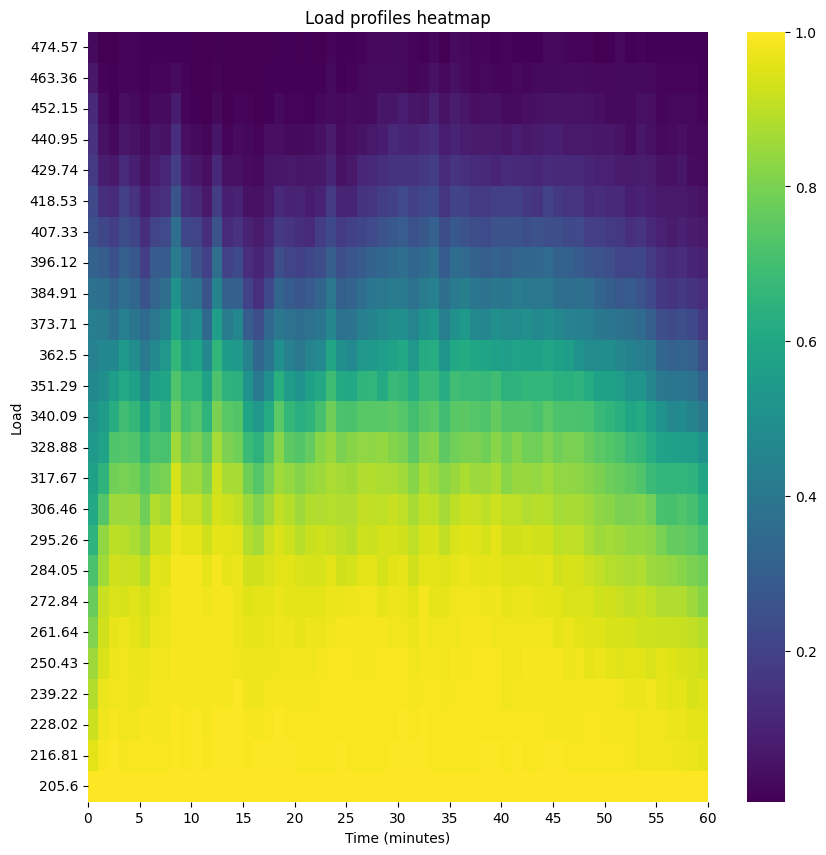

In [11]:
#make a heatmap for for hist_df
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(hist_df.loc[:150], cmap='viridis')
#add line to heatmap with mean load values
plt.xticks(np.arange(0, 61, 5), np.arange(0, 61, 5))
plt.xlabel('Time (minutes)')
plt.ylabel('Load')
plt.title('Load profiles heatmap')
#plt.legend()
plt.show()

In [31]:
hist_df.describe().loc['min'].min()

0.005

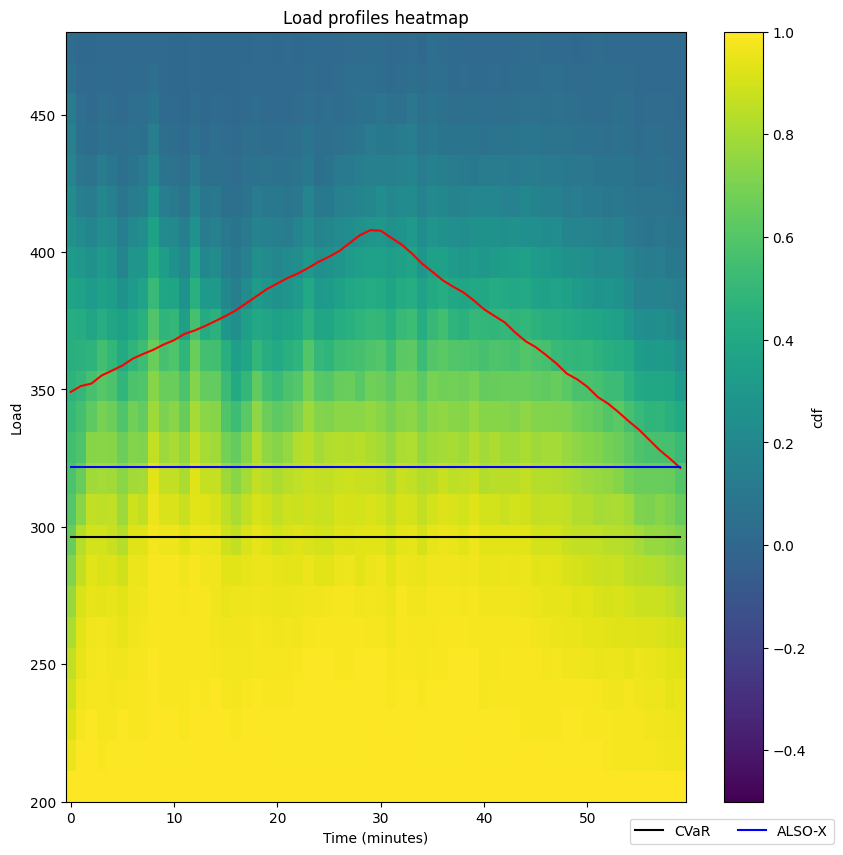

In [55]:
# make data with uneven sampling in x
x = range(0, 60, 1)
X, Y = np.meshgrid(x, borders)
Z = hist_df.values
# plot
fig, ax = plt.subplots(figsize=(10, 10))

c = ax.pcolormesh(X, Y, Z, vmin=-0.5, vmax=1.0)
plt.xlabel('Time (minutes)')
plt.ylabel('Load')
plt.title('Load profiles heatmap')
Also_X = 321.7965945853627
C_Var = 296.4980071934071
#make vector of 291 value vector
cvar_value = np.linspace(C_Var, C_Var, 60)
alsox_value = np.linspace(Also_X, Also_X, 60)

plt.plot(x, mean_load, color='red')
plt.plot(x, cvar_value , color='black', label='CVaR')
plt.plot(x, alsox_value , color='blue', label='ALSO-X')
fig.legend(bbox_to_anchor=(0.9, 0.1), ncols=3)

fig.colorbar(c, ax=ax, label='cdf')

plt.show()